In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

In [5]:
# load data
df = pd.read_csv('../data/telco_customer_churn.csv')

In [9]:
# first look
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\n First few rows:")
df.head()

Dataset shape: (7043, 21)

Column names and types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# check missing values
print("Missing Values: ")
print(df.isnull().sum())

Missing Values: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [19]:
# check data types
print("Data Types: ")
print(df.dtypes)

Data Types: 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [21]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
# churn distribution
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Rate:")
churn_rate = (df['Churn'] == 'Yes').sum() / len(df) * 100
print(f"{churn_rate:.2f}%")

Churn Distribution:
No     5174
Yes    1869
Name: Churn, dtype: int64

Churn Rate:
26.54%


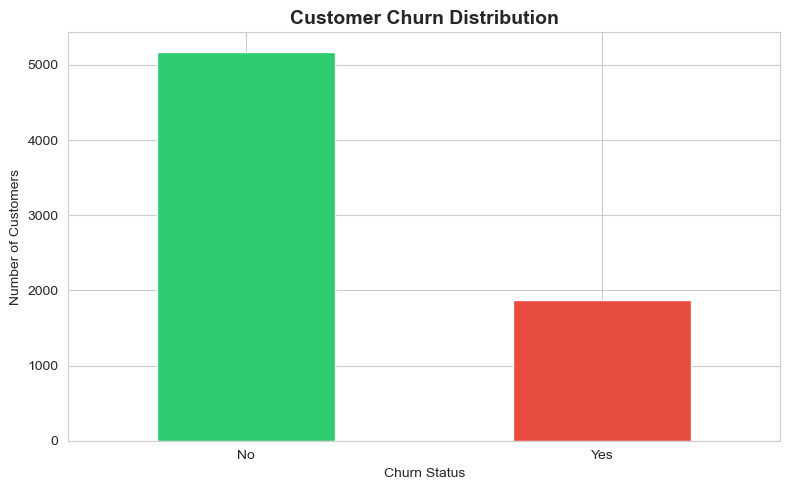

In [29]:
# visualize
plt.figure(figsize = (8,5))
df['Churn'].value_counts().plot(kind = 'bar', color = ['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution', fontsize = 14, fontweight = 'bold')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [31]:
# numerical columns analysis
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# check TotalCharges
print("TotalCharges unique value sample:")
print(df['TotalCharges'].unique()[:20])

TotalCharges unique value sample:
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95' '587.45' '326.8' '5681.1' '5036.3' '2686.05'
 '7895.15' '1022.95' '7382.25' '528.35' '1862.9']


In [53]:
# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

# check missing values
print("Missing values after conversion:")
print(df.isnull().sum())

Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
Churn_Binary         0
tenure_group        11
dtype: int64


In [55]:
# check rows with missing TotalCharges
missing_total_charges = df[df['TotalCharges'].isnull()]
print(f"\nRows with missing TotalCharges: {len(missing_total_charges)}")
print("\nThese customers have:")
print(missing_total_charges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())


Rows with missing TotalCharges: 0

These customers have:
Empty DataFrame
Columns: [customerID, tenure, MonthlyCharges, TotalCharges]
Index: []


In [57]:
# fill missing TotalCharges with MonthlyCharges (likely new customers with no tenure)
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace = True)

# verify missing values again
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
Churn_Binary         0
tenure_group        11
dtype: int64


In [59]:
# convert churn to binary
df['Churn_Binary'] = (df['Churn'] == 'Yes').astype(int)

print("Churn Binary Distribution:")
print(df['Churn_Binary'].value_counts())

Churn Binary Distribution:
0    5174
1    1869
Name: Churn_Binary, dtype: int64


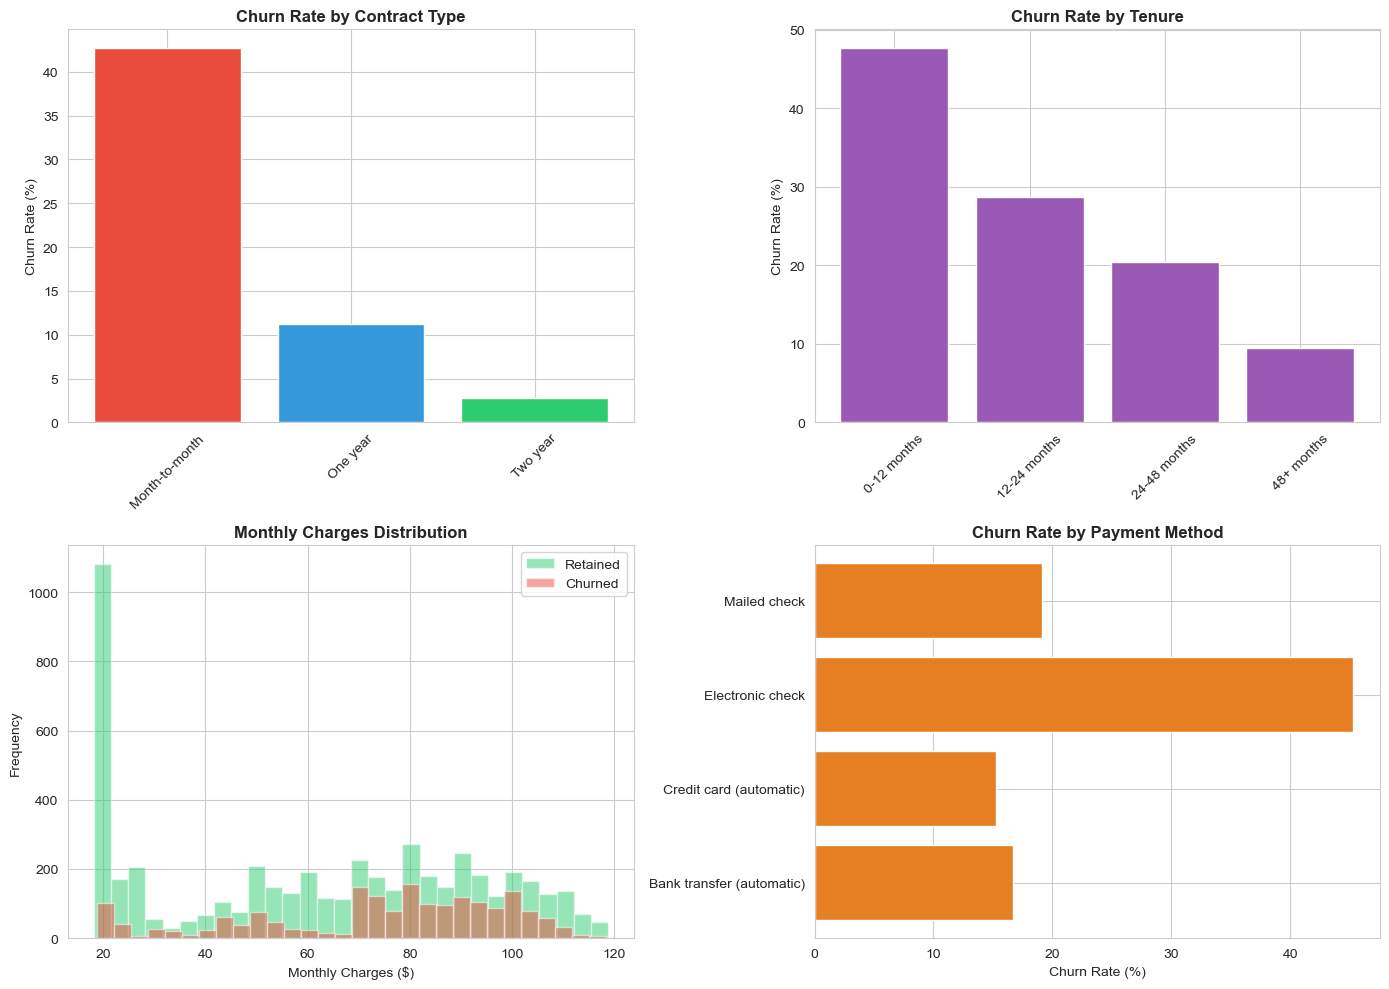


Key Insights:
1. Month-to-month contract churn rate: 42.7%
2. One year contract churn rate: 11.3%
3. Two year contract churn rate: 2.8%
4. New customers (0-12 months) churn rate: 47.7%
5. Established customers (48+ months) churn rate: 9.5%


In [61]:
# Churn rate by Contract Type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Churn by Contract Type
contract_churn = df.groupby('Contract')['Churn_Binary'].mean() * 100
axes[0, 0].bar(contract_churn.index, contract_churn.values, color=['#e74c3c', '#3498db', '#2ecc71'])
axes[0, 0].set_title('Churn Rate by Contract Type', fontweight='bold')
axes[0, 0].set_ylabel('Churn Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Churn by Tenure (binned)
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                              labels=['0-12 months', '12-24 months', '24-48 months', '48+ months'])
tenure_churn = df.groupby('tenure_group')['Churn_Binary'].mean() * 100
axes[0, 1].bar(range(len(tenure_churn)), tenure_churn.values, color='#9b59b6')
axes[0, 1].set_title('Churn Rate by Tenure', fontweight='bold')
axes[0, 1].set_ylabel('Churn Rate (%)')
axes[0, 1].set_xticks(range(len(tenure_churn)))
axes[0, 1].set_xticklabels(tenure_churn.index, rotation=45)

# 3. Monthly Charges Distribution (Churned vs Retained)
df[df['Churn'] == 'No']['MonthlyCharges'].hist(bins=30, alpha=0.5, label='Retained', ax=axes[1, 0], color='#2ecc71')
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(bins=30, alpha=0.5, label='Churned', ax=axes[1, 0], color='#e74c3c')
axes[1, 0].set_title('Monthly Charges Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Monthly Charges ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 4. Churn by Payment Method
payment_churn = df.groupby('PaymentMethod')['Churn_Binary'].mean() * 100
axes[1, 1].barh(payment_churn.index, payment_churn.values, color='#e67e22')
axes[1, 1].set_title('Churn Rate by Payment Method', fontweight='bold')
axes[1, 1].set_xlabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

# Print key insights
print("\nKey Insights:")
print(f"1. Month-to-month contract churn rate: {contract_churn['Month-to-month']:.1f}%")
print(f"2. One year contract churn rate: {contract_churn['One year']:.1f}%")
print(f"3. Two year contract churn rate: {contract_churn['Two year']:.1f}%")
print(f"4. New customers (0-12 months) churn rate: {tenure_churn.iloc[0]:.1f}%")
print(f"5. Established customers (48+ months) churn rate: {tenure_churn.iloc[-1]:.1f}%")

In [65]:
# 1. Customer Lifetime Value (CLV)
df['CLV'] = df['tenure'] * df['MonthlyCharges']

# 2. Average charge per month of tenure
df['AvgChargePerTenureMonth'] = df['TotalCharges'] / (df['tenure'] + 1)  # +1 to avoid division by zero

# 3. Customer segments based on value
df['CustomerValue'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 150], labels=['Low Value', 'Medium Value', 'High Value'])

# 4. New customer flag (less than 6 months)
df['IsNewCustomer'] = (df['tenure'] <= 6).astype(int)

# 5. Count total services used
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert 'Yes' to 1, everything else to 0
for col in service_cols:
    df[f'{col}_Binary'] = (df[col] == 'Yes').astype(int)

df['TotalServices'] = df[[f'{col}_Binary' for col in service_cols]].sum(axis=1)

# 6. Price per service
df['PricePerService'] = df['MonthlyCharges'] / (df['TotalServices'] + 1)  # +1 to avoid division by zero

# 7. Has automatic payment
df['HasAutomaticPayment'] = df['PaymentMethod'].str.contains('automatic').astype(int)

# 8. Has internet service
df['HasInternet'] = (df['InternetService'] != 'No').astype(int)

print("New Features Created:")
print(f"CLV range: ${df['CLV'].min():.2f} to ${df['CLV'].max():.2f}")
print(f"Total Services range: {df['TotalServices'].min()} to {df['TotalServices'].max()}")
print(f"New customers: {df['IsNewCustomer'].sum()} ({df['IsNewCustomer'].sum()/len(df)*100:.1f}%)")
print(f"Customers with automatic payment: {df['HasAutomaticPayment'].sum()} ({df['HasAutomaticPayment'].sum()/len(df)*100:.1f}%)")

New Features Created:
CLV range: $0.00 to $8550.00
Total Services range: 0 to 8
New customers: 1481 (21.0%)
Customers with automatic payment: 3066 (43.5%)


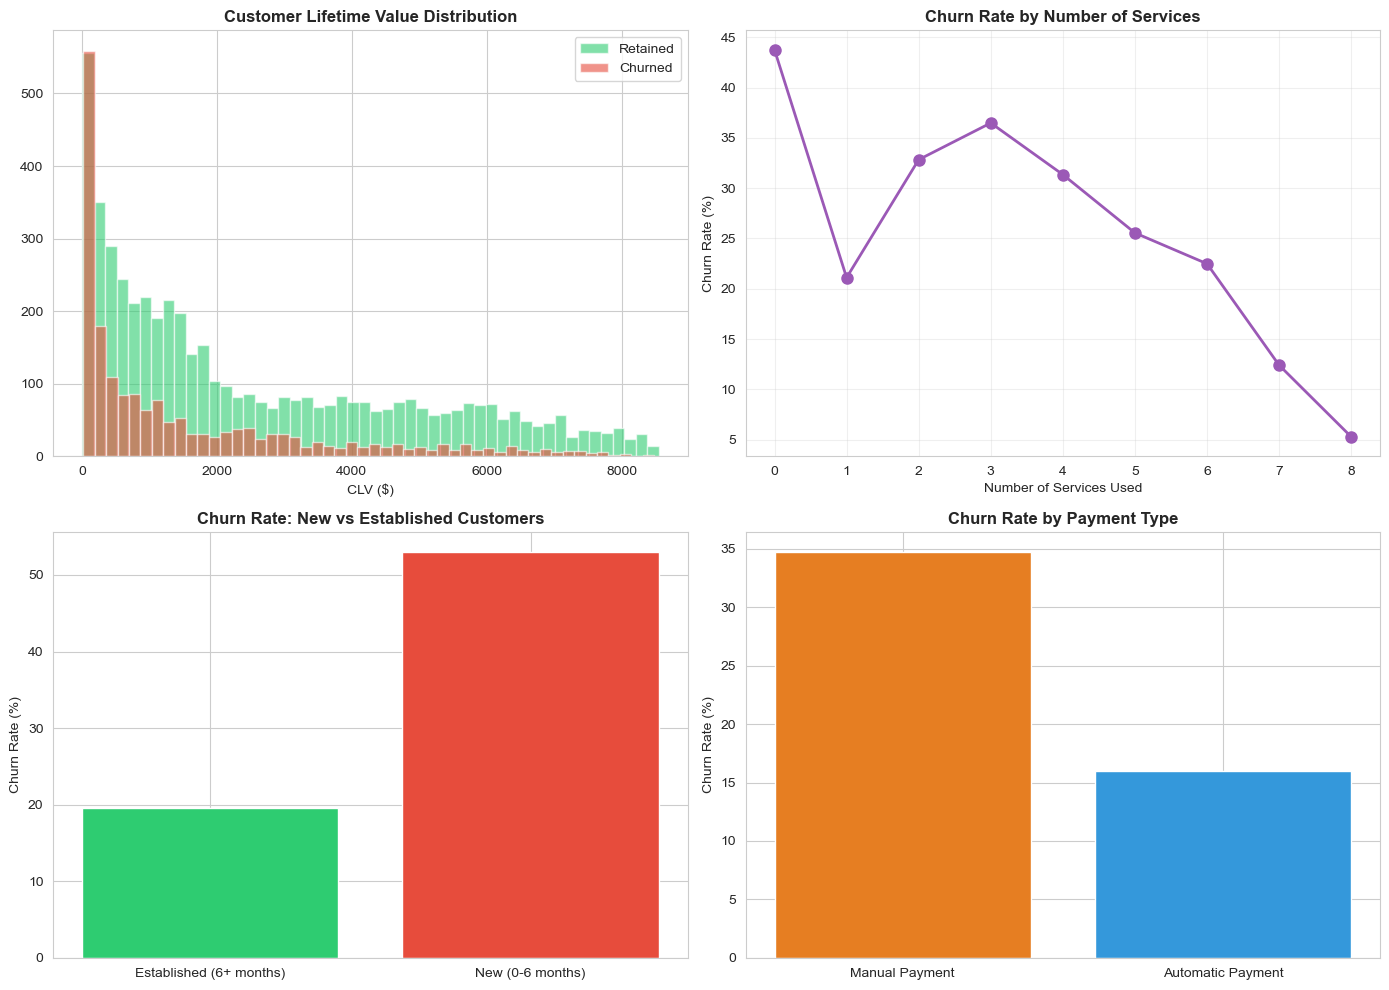


Feature Analysis:
Churned customers avg CLV: $1531.61
Retained customers avg CLV: $2549.77
Churned customers avg services: 3.13
Retained customers avg services: 3.45


In [67]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. CLV comparison
df[df['Churn'] == 'No']['CLV'].hist(bins=50, alpha=0.6, label='Retained', ax=axes[0, 0], color='#2ecc71')
df[df['Churn'] == 'Yes']['CLV'].hist(bins=50, alpha=0.6, label='Churned', ax=axes[0, 0], color='#e74c3c')
axes[0, 0].set_title('Customer Lifetime Value Distribution', fontweight='bold')
axes[0, 0].set_xlabel('CLV ($)')
axes[0, 0].legend()

# 2. Total Services vs Churn
services_churn = df.groupby('TotalServices')['Churn_Binary'].mean() * 100
axes[0, 1].plot(services_churn.index, services_churn.values, marker='o', linewidth=2, markersize=8, color='#9b59b6')
axes[0, 1].set_title('Churn Rate by Number of Services', fontweight='bold')
axes[0, 1].set_xlabel('Number of Services Used')
axes[0, 1].set_ylabel('Churn Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

# 3. New Customer Impact
new_customer_churn = df.groupby('IsNewCustomer')['Churn_Binary'].mean() * 100
axes[1, 0].bar(['Established (6+ months)', 'New (0-6 months)'], new_customer_churn.values, color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Churn Rate: New vs Established Customers', fontweight='bold')
axes[1, 0].set_ylabel('Churn Rate (%)')

# 4. Automatic Payment Impact
auto_payment_churn = df.groupby('HasAutomaticPayment')['Churn_Binary'].mean() * 100
axes[1, 1].bar(['Manual Payment', 'Automatic Payment'], auto_payment_churn.values, color=['#e67e22', '#3498db'])
axes[1, 1].set_title('Churn Rate by Payment Type', fontweight='bold')
axes[1, 1].set_ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

print("\nFeature Analysis:")
print(f"Churned customers avg CLV: ${df[df['Churn']=='Yes']['CLV'].mean():.2f}")
print(f"Retained customers avg CLV: ${df[df['Churn']=='No']['CLV'].mean():.2f}")
print(f"Churned customers avg services: {df[df['Churn']=='Yes']['TotalServices'].mean():.2f}")
print(f"Retained customers avg services: {df[df['Churn']=='No']['TotalServices'].mean():.2f}")

In [69]:
# prepare data for modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Select features for the model
feature_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'CLV', 'TotalServices', 'PricePerService', 'IsNewCustomer', 'HasAutomaticPayment', 'HasInternet']

# Add categorical features (need to encode them)
categorical_features = ['Contract', 'PaymentMethod', 'InternetService', 'gender']

# Create a copy for modeling
df_model = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_features:
    df_model[f'{col}_encoded'] = le.fit_transform(df_model[col])
    feature_columns.append(f'{col}_encoded')

# Prepare X (features) and y (target)
X = df_model[feature_columns]
y = df_model['Churn_Binary']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data prepared for modeling:")
print(f"Training set: {X_train.shape[0]} customers")
print(f"Test set: {X_test.shape[0]} customers")
print(f"Features used: {len(feature_columns)}")
print(f"\nFeatures: {feature_columns}")

Data prepared for modeling:
Training set: 5634 customers
Test set: 1409 customers
Features used: 13

Features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'CLV', 'TotalServices', 'PricePerService', 'IsNewCustomer', 'HasAutomaticPayment', 'HasInternet', 'Contract_encoded', 'PaymentMethod_encoded', 'InternetService_encoded', 'gender_encoded']


In [71]:
# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest model...")
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Model trained successfully!")
print(f"Training accuracy: {rf_model.score(X_train, y_train)*100:.2f}%")
print(f"Test accuracy: {rf_model.score(X_test, y_test)*100:.2f}%")

Training Random Forest model...
Model trained successfully!
Training accuracy: 83.49%
Test accuracy: 79.35%


MODEL PERFORMANCE METRICS
Accuracy:  79.35%
Precision: 64.66%  (Of customers we predicted would churn, what % actually churned)
Recall:    48.93%  (Of customers who actually churned, what % did we catch)
F1 Score:  0.557
ROC-AUC:   0.839


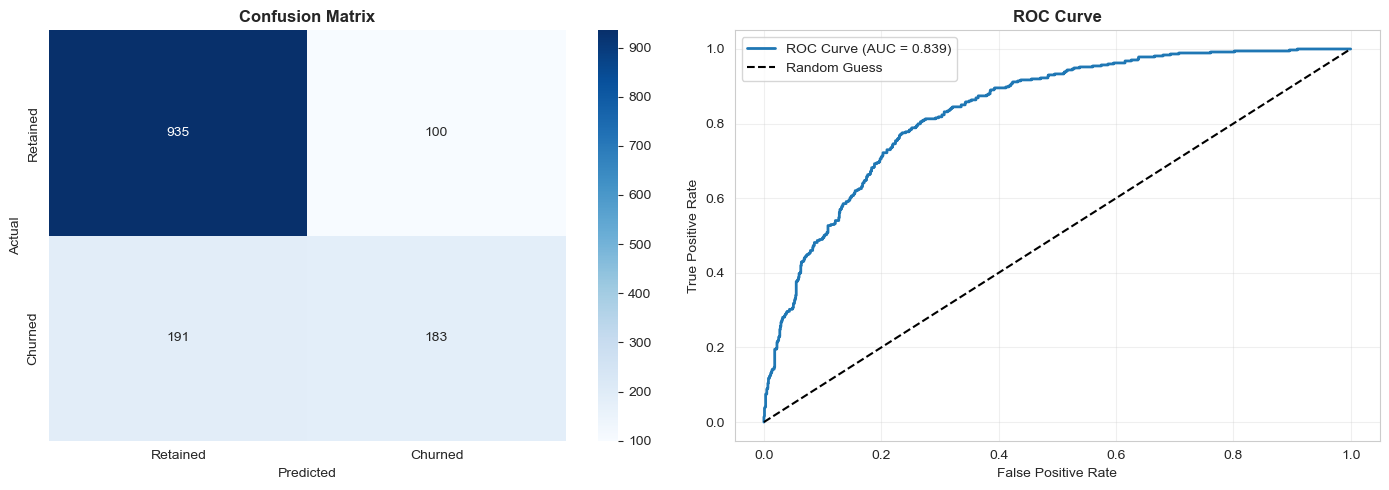


Business Impact:
✓ Correctly identified 183 churners (can target with retention campaigns)
✗ Missed 191 churners (would have churned without us knowing)
⚠ Falsely flagged 100 loyal customers as churners (wasted retention budget)
✓ Correctly identified 935 loyal customers (no action needed)


In [73]:
# evaluate model performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%  (Of customers we predicted would churn, what % actually churned)")
print(f"Recall:    {recall*100:.2f}%  (Of customers who actually churned, what % did we catch)")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")
print("="*50)

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
axes[0].set_title('Confusion Matrix', fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Plot 2: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Guess')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Business interpretation
tn, fp, fn, tp = cm.ravel()
print("\nBusiness Impact:")
print(f"✓ Correctly identified {tp} churners (can target with retention campaigns)")
print(f"✗ Missed {fn} churners (would have churned without us knowing)")
print(f"⚠ Falsely flagged {fp} loyal customers as churners (wasted retention budget)")
print(f"✓ Correctly identified {tn} loyal customers (no action needed)")

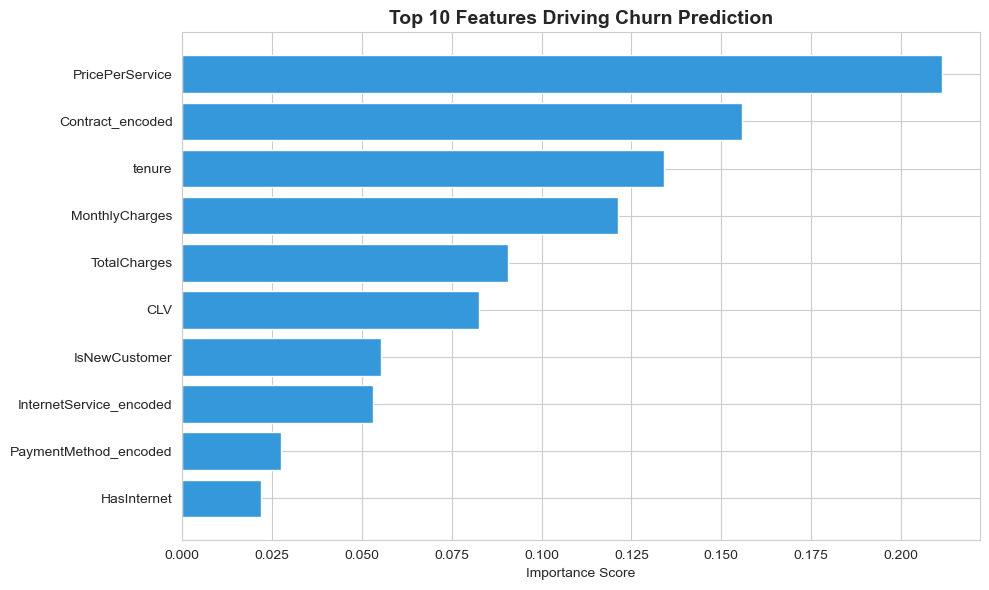


Top 5 Churn Drivers:
PricePerService: 0.2115
Contract_encoded: 0.1557
tenure: 0.1340
MonthlyCharges: 0.1214
TotalCharges: 0.0907


In [75]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'], color='#3498db')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score')
plt.title('Top 10 Features Driving Churn Prediction', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 5 Churn Drivers:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

In [77]:
# Predict on entire dataset
df_model['ChurnProbability'] = rf_model.predict_proba(df_model[feature_columns])[:, 1]
df_model['ChurnPrediction'] = rf_model.predict(df_model[feature_columns])

# Create risk categories
df_model['RiskCategory'] = pd.cut(df_model['ChurnProbability'], bins=[0, 0.3, 0.7, 1.0], labels=['Low Risk', 'Medium Risk', 'High Risk'])

# Add back to original dataframe
df['ChurnProbability'] = df_model['ChurnProbability']
df['ChurnPrediction'] = df_model['ChurnPrediction']
df['RiskCategory'] = df_model['RiskCategory']

print("Risk Distribution:")
print(df['RiskCategory'].value_counts())
print("\nHigh-Risk Customers:")
print(f"Total: {(df['RiskCategory'] == 'High Risk').sum()}")
print(f"Actual churn rate in high-risk group: {df[df['RiskCategory'] == 'High Risk']['Churn_Binary'].mean()*100:.1f}%")

Risk Distribution:
Low Risk       4362
Medium Risk    2163
High Risk       518
Name: RiskCategory, dtype: int64

High-Risk Customers:
Total: 518
Actual churn rate in high-risk group: 85.7%


In [79]:
# Find high-value customers at risk
high_value_at_risk = df[
    (df['ChurnProbability'] > 0.7) &  # High risk
    (df['CLV'] > df['CLV'].quantile(0.75))  # Top 25% by value
].sort_values('ChurnProbability', ascending=False)

print("="*60)
print("HIGH-VALUE CUSTOMERS AT RISK OF CHURNING")
print("="*60)
print(f"Total customers identified: {len(high_value_at_risk)}")
print(f"Total CLV at risk: ${high_value_at_risk['CLV'].sum():,.2f}")
print(f"Average monthly revenue at risk: ${high_value_at_risk['MonthlyCharges'].sum():,.2f}")
print("="*60)

# Show top 10
print("\nTop 10 Priority Customers:")
priority_customers = high_value_at_risk[['customerID', 'tenure', 'MonthlyCharges', 'CLV', 
                                          'Contract', 'ChurnProbability', 'TotalServices']].head(10)
print(priority_customers.to_string(index=False))

HIGH-VALUE CUSTOMERS AT RISK OF CHURNING
Total customers identified: 0
Total CLV at risk: $0.00
Average monthly revenue at risk: $0.00

Top 10 Priority Customers:
Empty DataFrame
Columns: [customerID, tenure, MonthlyCharges, CLV, Contract, ChurnProbability, TotalServices]
Index: []


In [81]:
# Segment analysis for recommendations
print("="*60)
print("RETENTION STRATEGY RECOMMENDATIONS")
print("="*60)

# Segment 1: New high-risk customers
new_high_risk = df[(df['IsNewCustomer'] == 1) & (df['ChurnProbability'] > 0.5)]
print(f"\n1. NEW CUSTOMERS AT RISK (0-6 months tenure)")
print(f"   Count: {len(new_high_risk)}")
print(f"   Action: Implement enhanced onboarding program")
print(f"   Potential savings: ${new_high_risk['MonthlyCharges'].sum() * 12:,.2f}/year")

# Segment 2: Month-to-month high-risk
monthly_high_risk = df[(df['Contract'] == 'Month-to-month') & (df['ChurnProbability'] > 0.5)]
print(f"\n2. MONTH-TO-MONTH HIGH RISK")
print(f"   Count: {len(monthly_high_risk)}")
print(f"   Action: Offer contract upgrade incentives (discount for annual contract)")
print(f"   Potential savings: ${monthly_high_risk['MonthlyCharges'].sum() * 12:,.2f}/year")

# Segment 3: Low service usage high-risk
low_service_risk = df[(df['TotalServices'] <= 2) & (df['ChurnProbability'] > 0.5)]
print(f"\n3. LOW SERVICE ENGAGEMENT")
print(f"   Count: {len(low_service_risk)}")
print(f"   Action: Cross-sell additional services, increase engagement")
print(f"   Potential savings: ${low_service_risk['MonthlyCharges'].sum() * 12:,.2f}/year")

# Segment 4: Manual payment high-risk
manual_payment_risk = df[(df['HasAutomaticPayment'] == 0) & (df['ChurnProbability'] > 0.5)]
print(f"\n4. MANUAL PAYMENT CUSTOMERS AT RISK")
print(f"   Count: {len(manual_payment_risk)}")
print(f"   Action: Incentivize automatic payment enrollment")
print(f"   Potential savings: ${manual_payment_risk['MonthlyCharges'].sum() * 12:,.2f}/year")

print("\n" + "="*60)

# Overall impact
total_at_risk = df[df['ChurnProbability'] > 0.5]
print(f"\nTOTAL IMPACT IF WE REDUCE CHURN BY 30% IN HIGH-RISK GROUP:")
print(f"Customers saved: {len(total_at_risk) * 0.3:.0f}")
print(f"Annual revenue saved: ${total_at_risk['MonthlyCharges'].sum() * 12 * 0.3:,.2f}")

RETENTION STRATEGY RECOMMENDATIONS

1. NEW CUSTOMERS AT RISK (0-6 months tenure)
   Count: 835
   Action: Implement enhanced onboarding program
   Potential savings: $701,901.00/year

2. MONTH-TO-MONTH HIGH RISK
   Count: 1391
   Action: Offer contract upgrade incentives (discount for annual contract)
   Potential savings: $1,308,387.60/year

3. LOW SERVICE ENGAGEMENT
   Count: 636
   Action: Cross-sell additional services, increase engagement
   Potential savings: $479,635.20/year

4. MANUAL PAYMENT CUSTOMERS AT RISK
   Count: 1197
   Action: Incentivize automatic payment enrollment
   Potential savings: $1,117,180.80/year


TOTAL IMPACT IF WE REDUCE CHURN BY 30% IN HIGH-RISK GROUP:
Customers saved: 418
Annual revenue saved: $392,896.62


In [83]:
# Save enhanced dataset with predictions
df_export = df[[
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'Churn',
    'CLV', 'TotalServices', 'PricePerService', 'IsNewCustomer', 
    'HasAutomaticPayment', 'CustomerValue', 'tenure_group',
    'ChurnProbability', 'ChurnPrediction', 'RiskCategory'
]]

# Export to CSV for Power BI
df_export.to_csv('../data/churn_data_with_predictions.csv', index=False)
print("✓ Data exported successfully!")
print(f"File saved: data/churn_data_with_predictions.csv")
print(f"Rows: {len(df_export)}, Columns: {len(df_export.columns)}")

✓ Data exported successfully!
File saved: data/churn_data_with_predictions.csv
Rows: 7043, Columns: 23


In [85]:
import sqlite3

# Create SQLite database
conn = sqlite3.connect('../data/churn_analysis.db')

# Load data into SQL database
df_export.to_sql('customers', conn, if_exists='replace', index=False)

print("✓ Database created successfully!")
print(f"Table: customers")
print(f"Rows: {len(df_export)}")

# Test connection
test_query = pd.read_sql("SELECT COUNT(*) as total_customers FROM customers", conn)
print(f"Total customers in database: {test_query['total_customers'][0]}")

✓ Database created successfully!
Table: customers
Rows: 7043
Total customers in database: 7043


In [87]:
import os

# Create sql folder if it doesn't exist
os.makedirs('../sql', exist_ok=True)

# All your SQL queries as a string
sql_queries = """-- ============================================================
-- CUSTOMER CHURN ANALYSIS - SQL QUERIES
-- ============================================================

-- Query 1: High-Risk Customer Identification
-- Purpose: Identify customers most likely to churn for targeted retention
SELECT 
    customerID,
    tenure,
    MonthlyCharges,
    CLV,
    Contract,
    ChurnProbability,
    RiskCategory,
    TotalServices
FROM customers
WHERE ChurnProbability > 0.7
  AND CLV > (SELECT AVG(CLV) FROM customers)
ORDER BY ChurnProbability DESC, CLV DESC
LIMIT 100;


-- Query 2: Churn Rate by Customer Segment
-- Purpose: Understand which segments have highest churn for strategy prioritization
SELECT 
    CASE 
        WHEN tenure < 6 THEN 'New (0-6 months)'
        WHEN tenure < 24 THEN 'Growing (6-24 months)'
        ELSE 'Established (24+ months)'
    END as customer_segment,
    COUNT(*) as total_customers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) as churned_customers,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as churn_rate_pct,
    ROUND(AVG(MonthlyCharges), 2) as avg_monthly_charges
FROM customers
GROUP BY customer_segment
ORDER BY churn_rate_pct DESC;


-- Query 3: Revenue at Risk Analysis
-- Purpose: Calculate potential revenue loss from predicted churners
SELECT 
    RiskCategory,
    COUNT(*) as customer_count,
    ROUND(SUM(MonthlyCharges), 2) as monthly_revenue_at_risk,
    ROUND(SUM(MonthlyCharges * 12), 2) as annual_revenue_at_risk,
    ROUND(AVG(ChurnProbability) * 100, 2) as avg_churn_probability_pct
FROM customers
WHERE ChurnProbability > 0.5
GROUP BY RiskCategory
ORDER BY annual_revenue_at_risk DESC;


-- Query 4: Contract Type Impact on Churn
-- Purpose: Quantify the relationship between contract type and retention
SELECT 
    Contract,
    COUNT(*) as total_customers,
    ROUND(AVG(tenure), 1) as avg_tenure_months,
    ROUND(AVG(MonthlyCharges), 2) as avg_monthly_charges,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) as churned_count,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as churn_rate_pct,
    ROUND(SUM(CLV), 2) as total_clv
FROM customers
GROUP BY Contract
ORDER BY churn_rate_pct DESC;


-- Query 5: Service Usage vs Churn Correlation
-- Purpose: Understand if service engagement reduces churn
SELECT 
    TotalServices,
    COUNT(*) as customer_count,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as churn_rate_pct,
    ROUND(AVG(MonthlyCharges), 2) as avg_monthly_charges
FROM customers
GROUP BY TotalServices
ORDER BY TotalServices;


-- Query 6: Payment Method Effectiveness
-- Purpose: Identify which payment methods correlate with lower churn
SELECT 
    PaymentMethod,
    COUNT(*) as customer_count,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as churn_rate_pct,
    ROUND(AVG(tenure), 1) as avg_tenure_months,
    HasAutomaticPayment
FROM customers
GROUP BY PaymentMethod, HasAutomaticPayment
ORDER BY churn_rate_pct DESC;


-- Query 7: New Customer Onboarding Success
-- Purpose: Track churn in first 6 months to optimize onboarding
SELECT 
    CASE 
        WHEN IsNewCustomer = 1 THEN 'New Customer (0-6 months)'
        ELSE 'Established Customer (6+ months)'
    END as customer_type,
    COUNT(*) as total_customers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) as churned_customers,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as churn_rate_pct,
    ROUND(AVG(TotalServices), 2) as avg_services_used
FROM customers
GROUP BY customer_type;


-- Query 8: Customer Value Segmentation with Risk
-- Purpose: Prioritize retention efforts by customer value and risk
SELECT 
    CustomerValue,
    RiskCategory,
    COUNT(*) as customer_count,
    ROUND(AVG(MonthlyCharges), 2) as avg_monthly_charges,
    ROUND(SUM(CLV), 2) as total_clv,
    ROUND(AVG(ChurnProbability) * 100, 2) as avg_churn_prob_pct
FROM customers
GROUP BY CustomerValue, RiskCategory
ORDER BY CustomerValue DESC, RiskCategory DESC;


-- Query 9: Retention Campaign Target List
-- Purpose: Generate actionable list for retention team
SELECT 
    customerID,
    tenure,
    Contract,
    MonthlyCharges,
    TotalServices,
    ChurnProbability,
    CASE 
        WHEN Contract = 'Month-to-month' AND ChurnProbability > 0.7 
            THEN 'Offer annual contract discount'
        WHEN TotalServices <= 2 AND ChurnProbability > 0.6 
            THEN 'Cross-sell additional services'
        WHEN HasAutomaticPayment = 0 AND ChurnProbability > 0.5 
            THEN 'Incentivize auto-payment'
        WHEN IsNewCustomer = 1 AND ChurnProbability > 0.6 
            THEN 'Enhanced onboarding support'
        ELSE 'General retention outreach'
    END as recommended_action
FROM customers
WHERE ChurnProbability > 0.5
ORDER BY ChurnProbability DESC, CLV DESC
LIMIT 500;


-- Query 10: Monthly Cohort Retention Analysis
-- Purpose: Track retention by tenure cohort for trend analysis
SELECT 
    tenure_group,
    COUNT(*) as total_customers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) as churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as churn_rate_pct,
    ROUND(AVG(MonthlyCharges), 2) as avg_monthly_revenue,
    ROUND(SUM(MonthlyCharges * 12), 2) as annual_revenue
FROM customers
WHERE tenure_group IS NOT NULL
GROUP BY tenure_group
ORDER BY 
    CASE tenure_group
        WHEN '0-12 months' THEN 1
        WHEN '12-24 months' THEN 2
        WHEN '24-48 months' THEN 3
        WHEN '48+ months' THEN 4
    END;
"""

# Write to file
with open('../sql/churn_analysis_queries.sql', 'w') as f:
    f.write(sql_queries)

print("✓ SQL file created successfully!")
print("Location: sql/churn_analysis_queries.sql")

# Verify it exists
if os.path.exists('../sql/churn_analysis_queries.sql'):
    print("✓ File verified - ready for GitHub!")

✓ SQL file created successfully!
Location: sql/churn_analysis_queries.sql
✓ File verified - ready for GitHub!


In [89]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect('../data/churn_analysis.db')

print("Testing SQL Queries...\n")

# Query 1: High-Risk Customers
print("="*60)
print("QUERY 1: Top 10 High-Risk Customers")
print("="*60)
query1 = """
SELECT 
    customerID, tenure, MonthlyCharges, CLV, Contract, 
    ROUND(ChurnProbability, 3) as ChurnProb, RiskCategory
FROM customers
WHERE ChurnProbability > 0.7
ORDER BY ChurnProbability DESC, CLV DESC
LIMIT 10
"""
result1 = pd.read_sql(query1, conn)
print(result1.to_string(index=False))

# Query 2: Churn by Segment
print("\n" + "="*60)
print("QUERY 2: Churn Rate by Customer Segment")
print("="*60)
query2 = """
SELECT 
    CASE 
        WHEN tenure < 6 THEN 'New (0-6 months)'
        WHEN tenure < 24 THEN 'Growing (6-24 months)'
        ELSE 'Established (24+ months)'
    END as customer_segment,
    COUNT(*) as total_customers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) as churned,
    ROUND(100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) as churn_rate_pct
FROM customers
GROUP BY customer_segment
"""
result2 = pd.read_sql(query2, conn)
print(result2.to_string(index=False))

# Query 3: Revenue at Risk
print("\n" + "="*60)
print("QUERY 3: Revenue at Risk by Category")
print("="*60)
query3 = """
SELECT 
    RiskCategory,
    COUNT(*) as customers,
    ROUND(SUM(MonthlyCharges * 12), 2) as annual_revenue_at_risk
FROM customers
WHERE ChurnProbability > 0.5
GROUP BY RiskCategory
ORDER BY annual_revenue_at_risk DESC
"""
result3 = pd.read_sql(query3, conn)
print(result3.to_string(index=False))

# Query 4: Retention Recommendations
print("\n" + "="*60)
print("QUERY 4: Top 10 Retention Actions")
print("="*60)
query4 = """
SELECT 
    customerID,
    tenure,
    Contract,
    ROUND(MonthlyCharges, 2) as MonthlyCharges,
    ROUND(ChurnProbability, 3) as ChurnProb,
    CASE 
        WHEN Contract = 'Month-to-month' AND ChurnProbability > 0.7 
            THEN 'Offer annual contract discount'
        WHEN TotalServices <= 2 AND ChurnProbability > 0.6 
            THEN 'Cross-sell additional services'
        WHEN HasAutomaticPayment = 0 AND ChurnProbability > 0.5 
            THEN 'Incentivize auto-payment'
        WHEN IsNewCustomer = 1 AND ChurnProbability > 0.6 
            THEN 'Enhanced onboarding support'
        ELSE 'General retention outreach'
    END as recommended_action
FROM customers
WHERE ChurnProbability > 0.5
ORDER BY ChurnProbability DESC
LIMIT 10
"""
result4 = pd.read_sql(query4, conn)
print(result4.to_string(index=False))

print("\n" + "="*60)
print("✓ All SQL queries executed successfully!")
print("="*60)

# Close connection
conn.close()

Testing SQL Queries...

QUERY 1: Top 10 High-Risk Customers
customerID  tenure  MonthlyCharges   CLV       Contract  ChurnProb RiskCategory
8375-DKEBR       1           69.60 69.60 Month-to-month      0.972    High Risk
2636-ALXXZ       1           69.60 69.60 Month-to-month      0.972    High Risk
7665-TOALD       1           69.60 69.60 Month-to-month      0.972    High Risk
2506-TNFCO       1           69.55 69.55 Month-to-month      0.969    High Risk
6502-MJQAE       1           69.60 69.60 Month-to-month      0.968    High Risk
0488-GSLFR       1           69.50 69.50 Month-to-month      0.967    High Risk
7206-GZCDC       1           69.25 69.25 Month-to-month      0.966    High Risk
0679-IDSTG       1           69.25 69.25 Month-to-month      0.966    High Risk
4871-JTKJF       1           69.65 69.65 Month-to-month      0.966    High Risk
4550-EVXNY       1           69.65 69.65 Month-to-month      0.966    High Risk

QUERY 2: Churn Rate by Customer Segment
        customer_se